In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/topic-modeling-for-research-articles/train.csv
/kaggle/input/topic-modeling-for-research-articles/test.csv


In [2]:
import pandas as pd
train = pd.read_csv("/kaggle/input/topic-modeling-for-research-articles/train.csv")
test = pd.read_csv("/kaggle/input/topic-modeling-for-research-articles/test.csv")

In [3]:
train.shape

(20972, 9)

In [4]:
train.sample(5)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
15696,15697,Competition between disorder and interaction e...,We investigate the low-energy scaling behavi...,0,1,0,0,0,0
5092,5093,Deep Graph Infomax,"We present Deep Graph Infomax (DGI), a gener...",1,0,0,1,0,0
4000,4001,Doubly autoparallel structure on the probabili...,"On the probability simplex, we can consider ...",0,0,1,0,0,0
9021,9022,Resonant inelastic x-ray scattering probes the...,Resonant inelastic x-ray scattering at the N...,0,1,0,0,0,0
20218,20219,Hardy Spaces over Half-strip Domains,We define Hardy spaces $H^p(\Omega_\pm)$ on ...,0,0,1,0,0,0


In [5]:
text = train['TITLE']+train['ABSTRACT']

In [6]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import models

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [9]:
def text_process(text):
    text = text.lower()
    text = re.sub('[^A-Za-z]', ' ',text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'#\w+|\@\w+', ' ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text, flags=re.MULTILINE)
    words = word_tokenize(text)
    
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    processed_text = ' '.join(words)

    return processed_text

In [10]:
cleaned_text = text.map(text_process)

In [11]:
text[0]

"Reconstructing Subject-Specific Effect Maps  Predictive models allow subject-specific inference when analyzing disease\nrelated alterations in neuroimaging data. Given a subject's data, inference can\nbe made at two levels: global, i.e. identifiying condition presence for the\nsubject, and local, i.e. detecting condition effect on each individual\nmeasurement extracted from the subject's data. While global inference is widely\nused, local inference, which can be used to form subject-specific effect maps,\nis rarely used because existing models often yield noisy detections composed of\ndispersed isolated islands. In this article, we propose a reconstruction\nmethod, named RSM, to improve subject-specific detections of predictive\nmodeling approaches and in particular, binary classifiers. RSM specifically\naims to reduce noise due to sampling error associated with using a finite\nsample of examples to train classifiers. The proposed method is a wrapper-type\nalgorithm that can be used w

In [12]:
cleaned_text[0]

'reconstructing subject specific effect maps predictive models allow subject specific inference analyzing disease related alterations neuroimaging data given subject data inference made two levels global e identifiying condition presence subject local e detecting condition effect individual measurement extracted subject data global inference widely used local inference used form subject specific effect maps rarely used existing models often yield noisy detections composed dispersed isolated islands article propose reconstruction method named rsm improve subject specific detections predictive modeling approaches particular binary classifiers rsm specifically aims reduce noise due sampling error associated using finite sample examples train classifiers proposed method wrapper type algorithm used different binary classifiers diagnostic manner e without information condition presence reconstruction posed maximum posteriori problem prior model whose parameters estimated training data classi

In [13]:
words = [x.split() for x in cleaned_text]

In [14]:
len(words)

20972

In [15]:
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser','ner'])

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [16]:
words[1]

['rotation',
 'invariance',
 'neural',
 'network',
 'rotation',
 'invariance',
 'translation',
 'invariance',
 'great',
 'values',
 'image',
 'recognition',
 'tasks',
 'paper',
 'bring',
 'new',
 'architecture',
 'convolutional',
 'neural',
 'network',
 'cnn',
 'named',
 'cyclic',
 'convolutional',
 'layer',
 'achieve',
 'rotation',
 'invariance',
 'symbol',
 'recognition',
 'also',
 'get',
 'position',
 'orientation',
 'symbol',
 'network',
 'achieve',
 'detection',
 'purpose',
 'multiple',
 'non',
 'overlap',
 'target',
 'last',
 'least',
 'architecture',
 'achieve',
 'one',
 'shot',
 'learning',
 'cases',
 'using',
 'invariance']

In [17]:
for i in nlp(' '.join(words[0])):
    print(i,'-->',i.pos_)

reconstructing --> VERB
subject --> ADJ
specific --> ADJ
effect --> NOUN
maps --> NOUN
predictive --> ADJ
models --> NOUN
allow --> VERB
subject --> ADJ
specific --> ADJ
inference --> NOUN
analyzing --> NOUN
disease --> NOUN
related --> VERB
alterations --> NOUN
neuroimaging --> VERB
data --> NOUN
given --> VERB
subject --> ADJ
data --> NOUN
inference --> NOUN
made --> VERB
two --> NUM
levels --> NOUN
global --> ADJ
e --> NOUN
identifiying --> VERB
condition --> NOUN
presence --> NOUN
subject --> VERB
local --> ADJ
e --> NOUN
detecting --> VERB
condition --> NOUN
effect --> NOUN
individual --> ADJ
measurement --> NOUN
extracted --> VERB
subject --> ADJ
data --> NOUN
global --> ADJ
inference --> NOUN
widely --> ADV
used --> VERB
local --> ADJ
inference --> NOUN
used --> VERB
form --> NOUN
subject --> ADJ
specific --> ADJ
effect --> NOUN
maps --> NOUN
rarely --> ADV
used --> VERB
existing --> VERB
models --> NOUN
often --> ADV
yield --> VERB
noisy --> ADJ
detections --> NOUN
composed -->

In [18]:
def lemmatize(bow,tag=['NOUN','PROPN','ADJ','VERB','ADV']):
  proper_words=[]
  for i in bow:
    doc = nlp(' '.join(i))
    proper_words.append([token.lemma_ for token in doc if token.pos_ in tag])
  return proper_words

In [19]:
bag_of_words = lemmatize(words)

In [20]:
bag_of_words[0]

['reconstruct',
 'subject',
 'specific',
 'effect',
 'map',
 'predictive',
 'model',
 'allow',
 'subject',
 'specific',
 'inference',
 'analyzing',
 'disease',
 'relate',
 'alteration',
 'neuroimage',
 'datum',
 'give',
 'subject',
 'data',
 'inference',
 'make',
 'level',
 'global',
 'e',
 'identifiye',
 'condition',
 'presence',
 'subject',
 'local',
 'e',
 'detect',
 'condition',
 'effect',
 'individual',
 'measurement',
 'extract',
 'subject',
 'datum',
 'global',
 'inference',
 'widely',
 'use',
 'local',
 'inference',
 'use',
 'form',
 'subject',
 'specific',
 'effect',
 'map',
 'rarely',
 'use',
 'exist',
 'model',
 'often',
 'yield',
 'noisy',
 'detection',
 'compose',
 'disperse',
 'isolate',
 'island',
 'article',
 'propose',
 'reconstruction',
 'method',
 'name',
 'improve',
 'subject',
 'specific',
 'detection',
 'predictive',
 'modeling',
 'approach',
 'particular',
 'binary',
 'classifier',
 'specifically',
 'aim',
 'reduce',
 'noise',
 'due',
 'sample',
 'error',
 'assoc

In [21]:
from gensim import corpora
id2word = corpora.Dictionary(bag_of_words)

In [22]:
corpus = [id2word.doc2bow(sen) for sen in bag_of_words]

In [23]:
corpus[0]

[(0, 1),
 (1, 3),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 2),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 3),
 (21, 1),
 (22, 1),
 (23, 3),
 (24, 1),
 (25, 1),
 (26, 2),
 (27, 1),
 (28, 2),
 (29, 6),
 (30, 1),
 (31, 1),
 (32, 5),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 3),
 (37, 1),
 (38, 1),
 (39, 3),
 (40, 3),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 2),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 2),
 (60, 1),
 (61, 1),
 (62, 4),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 2),
 (68, 2),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 2),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 2),
 (78, 1),
 (79, 4),
 (80, 1),
 (81, 1),
 (82, 2),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 2),
 (93, 2),
 (94, 1),
 (95, 1),
 (96, 2),
 (97, 1),
 (98, 1),
 (99, 2),
 (100, 1),

In [24]:
LDA = gensim.models.ldamodel.LdaModel

In [25]:
lda_model = LDA(corpus=corpus,num_topics=5,id2word=id2word,chunksize=100,passes=5,random_state=4)

In [26]:
# ! pip install pyLDAvis

In [27]:
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

/opt/conda/lib/python3.10/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.040789 -0.186996       1        1  33.291961
2     -0.065607 -0.103533       2        1  23.359806
3      0.036277 -0.067807       3        1  16.591269
4     -0.248395  0.168150       4        1  15.543753
0      0.236937  0.190187       5        1  11.213211, topic_info=           Term          Freq         Total Category  logprob  loglift
139     network  12830.000000  12830.000000  Default  30.0000  30.0000
3     algorithm   8772.000000   8772.000000  Default  29.0000  29.0000
876       learn   7686.000000   7686.000000  Default  28.0000  28.0000
95      problem   9867.000000   9867.000000  Default  27.0000  27.0000
77       method  11844.000000  11844.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
845           h    721.983422   1984.715006   Topic5  -5.7727   1.1768
398       field    727.779685   4728.141798   Topic5  -5.7647   0.3168
1165     source    714.160359   2022.267690   Topic5  -5.7836   1.1472
79        model    725.415309  19942.789180   Topic5  -5.7680  -1.1258
458       scale    717.216418   3734.050774   Topic5  -5.7793   0.5382

[341 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
5535      5  0.998754    accretion
1235      1  0.999118  adversarial
3482      4  0.998245       affine
4108      4  0.999366      algebra
682       4  0.998169    algebraic
...     ...       ...          ...
429       4  0.102456         work
429       5  0.018965         work
1637      1  0.999512        world
335       4  0.842042            x
335       5  0.157753            x

[577 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 5, 1])

In [29]:
print('Perplexity-->',lda_model.log_perplexity(corpus))

from gensim.models import CoherenceModel
co_model = CoherenceModel(model = lda_model,texts = bag_of_words,dictionary=id2word,coherence='c_v')
co_lda = co_model.get_coherence()
print("\ncoherence score-->",co_lda)

Perplexity--> -7.9742387246489255

coherence score--> 0.4665126734260737


In [30]:
def cluster_topics(dictionary,corpus,texts,limit,start=5,step=3):
    coherence_values=[]
    model_list=[]
    for no_topics in range(start,limit,step):
        model = LDA(corpus=corpus,num_topics=no_topics,id2word=id2word)
        model_list.append(model)
        co_model = CoherenceModel(model = lda_model,texts = bag_of_words,dictionary=id2word,coherence='c_v')
        coherence_values.append(co_model.get_coherence())
    return model_list,coherence_values

In [31]:
model_list,coherence_values = cluster_topics(dictionary = id2word,corpus=corpus,texts =bag_of_words,start=15,limit=40,step=6)

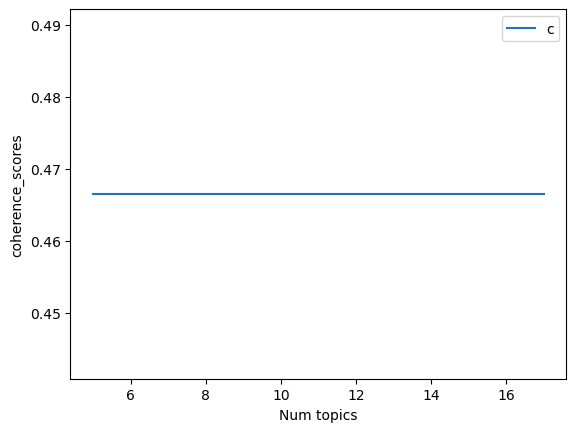

In [32]:
limit=20;start=5;step=3
x=range(start,limit,step)
plt.plot(x,coherence_values)
plt.xlabel('Num topics')
plt.ylabel("coherence_scores")
plt.legend(('coherence_values'),loc='best')
plt.show()